#### 1.6.1. File input/output

In [1]:
import numpy as np
from scipy import io as spio

In [2]:
# python에 matlab file을 읽을 수 있다.
a=np.ones((3,3))
spio.savemat('file.mat',{'a':a})
spio.loadmat('file.mat')['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [3]:
# reading images
# imageio는 scipy의 imread에서 전환되었다. 따로 install이 필요하다.
import imageio

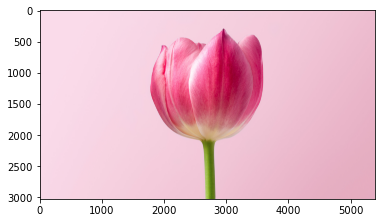

In [4]:
import matplotlib.pyplot as plt
img=imageio.imread('tulip.jpg')
plt.imshow(img)


#### 1.6.2. scipy.special
- Bessel, Jacobian elliptic, Gamma, Erf 등 함수가 있다
- Bessel function
    - 원통 좌표계에서의 헬렘홀츠 방정식 (전자파 방사 패턴)
    - drum waveform
    - https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane
- Jacobian elliptic
    - 타원함수의 일반화 (Jacobi)
    - 진자의 진폭이 작으면 각도는 시간에 따른 sin 함수로 근사할 수 있다.
    - 그러나 일반적인 진폭에서의 각도는 시간에 따른 Jacobian elliptic 함수 이다.
    - https://en.wikipedia.org/wiki/Pendulum
- Gamma 
    - Fatorial 의 실수, 복소수로 개념 확장.
    - Gamma distribution: 지진간의 시간 간격, 은행에서 손님 방문 간격, 표본 분산의 분포
    - https://en.wikipedia.org/wiki/Gamma_function
- Erf (오차함수, error function)
    - 정규분표에서 $1\sigma, 2\sigma, 3\sigma$등의 계산

#### 1.6.3 Linear algebra operation
- det, inv
- decomposition
    - SVD: singular value decomposition, spectrum (eigen value) decomposition 
    - QR, LU, Schur
- 연립 방정식의 해
    - 미지수와 방정식의 개수가 같을 경우 계수행렬은 정사각행렬이다.
    
$\begin{array}{l}{a_{11}x_1} + {a_{120}x_2} + {a_{13}x_3} = b_1\\
     {a_{21}x_1} +{a_{22}x_2} + {a_{23}x_3} = b_2\\
     {a_{31}x_1} +{a_{32}x_2} + {a_{33}x_3} = b_3\end{array}$

$A=\begin{bmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{bmatrix}$, $\mathbf{b}=\begin{bmatrix}b_1\\b_2\\b_3\end{bmatrix}$,
$\mathbf{x}=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}$


$A\mathbf{x}=\mathbf{b}$
- $A$ 가 정사각행렬이고 $det(A)\ne 0$ 라면 $A^{-1}A=I$ 인 $A^{-1}$가 존재한다.
- $A^{-1}A\mathbf{x}=A^{-1}\mathbf{b}$ 이므로 $\mathbf{x}=A^{-1}\mathbf{b}$ 로 해를 구할 수 있다.
- $det(A)=0$ 이라면 해가 없거나 무수히 많다.



#### 다음 연립방정식의 해를 구하시오
$\begin{array}{l}{x_1} + {x_2} + 2{x_3} = 8\\
     - {x_1} - 2{x_2} + 3{x_3} = 1\\
     3{x_1} - 7{x_2} + 4{x_3} = 10\end{array}$

In [5]:
from scipy import linalg
import numpy as np
A=np.array([[1,1,2],[-1,-2,3],[3,-7,4]])
b=np.array([8,1,10])[:,np.newaxis]
print(A,'\n',b)

[[ 1  1  2]
 [-1 -2  3]
 [ 3 -7  4]] 
 [[ 8]
 [ 1]
 [10]]


In [6]:
# determinant가 0이면 해가 없거나 무수히 많다.
linalg.det(A)

52.0

In [7]:
Ai=linalg.inv(A)
x=np.dot(Ai,b)
x

array([[3.],
       [1.],
       [2.]])

**해가 없는 경우**  
$x+y=1$  
$2x+2y=1$

**해가 무수히 많은 경우**  
$x+y=1$  
$2x+2y=2$

In [8]:
linalg.det(np.array([[1,1],[2,2]]))

0.0

**퀴즈 scipy 1 practrice 1번**

#### 1.6.4 interpolation
- scipy.interpolate.interp1d 함수
- 1차원 측정 데이터에서 없는 부분을 보간하는 데 사용한다.
- interpolation functions
    - interp1d: linear, nearest, quadratic, cubic spline
    - UnivariateSpline
    - Rbf: radia basis function
- interp2d는 2차원 interpolation이다.

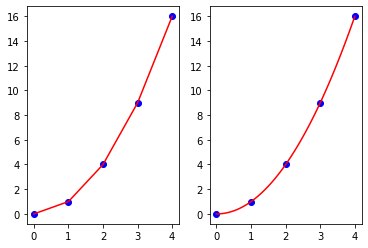

In [9]:
#1D interpolation
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# sampled data
xs = np.arange(5)
ys = xs**2

# linear interpolation
interp_func = interp1d(xs, ys) #default 'linear'
xi=np.linspace(xs[0], xs[-1], 100)
yi = interp_func(xi)

plt.subplot(121)
plt.plot(xs,ys,'bo')
plt.plot(xi,yi,'r')

# cubic interpolation
interp_func = interp1d(xs, ys, kind='cubic')
xi=np.linspace(xs[0], xs[-1], 100)
yi = interp_func(xi)

plt.subplot(122)
plt.plot(xs,ys,'bo')
plt.plot(xi,yi,'r')

**example**  
- 다음 데이터는 0,2,4,6,8,10 초에 측정한 값이다.
> 0.  , 1.41, 2.  , 2.45, 2.83, 3.16
- cubic interpolation으로 5초에서의 데이터를 추정하라

2.3420677083333334


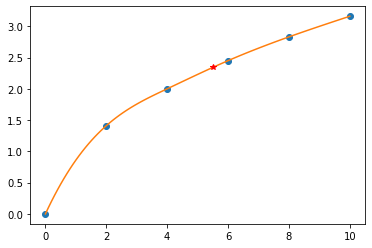

In [12]:
ts=np.array([0,2,4,6,8,10])
ys=np.array([0.  , 1.41, 2.  , 2.45, 2.83, 3.16])
plt.plot(ts,ys,'o')
f1 = interp1d(ts,ys,'cubic')
print(f1(5.5))
t=np.linspace(0,10,100)
plt.plot(t,f1(t))
plt.plot(5.5,f1(5.5),'r*')

**퀴즈 scipy 1 practice 2번**

#### 1.6.5 optimization and fit
- optimization은 최소화 또는 최적화를 위한 수치해석적 해를 찾는 것이다.
- from scipy import optimize  

**1.6.4.1** Curve fitting

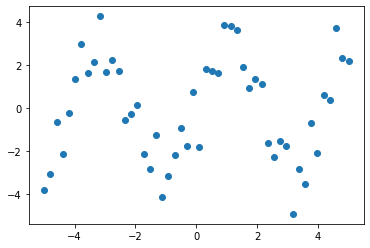

In [4]:
# 초기 값에 둔감한 예제
import numpy as np
import matplotlib.pyplot as plt
# example data
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.plot(x_data,y_data,'o')

In [5]:
from scipy import optimize
# 상기 데이터는 sin 함수인데 잡음이 껴 있다고 가정
def test_func(x, a, b):
    return a * np.sin(b * x)

In [6]:
p0=[0,0]
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[3.08398641 1.49339625]


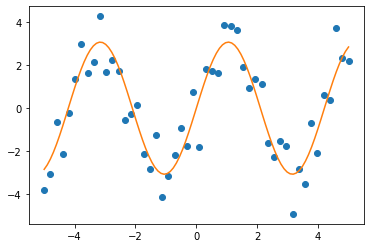

In [7]:
# fitted curve를 그려본다.
plt.plot(x_data,y_data,'o')
xs=np.linspace(np.min(x_data),np.max(x_data),100)
ys=test_func(xs,params[0],params[1])
plt.plot(xs,ys)

[3.08398641 1.49339625]


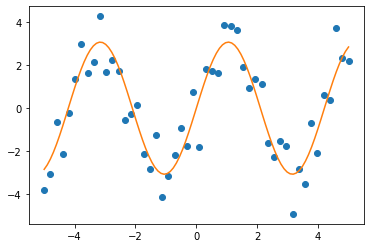

In [8]:
p0=[1,0]
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)
# fitted curve를 그려본다.
plt.plot(x_data,y_data,'o')
xs=np.linspace(np.min(x_data),np.max(x_data),100)
ys=test_func(xs,params[0],params[1])
plt.plot(xs,ys)

**Non noisy example 1**
- 다음 데이터는 $ax^3+b$ 로 생성되었다는 것을 알았다. $a,b$는 얼마인가?  
x: -5,-4,-3,-2,-1,0,1,2,3,4,5  
y: -300, -178, -104, -66, -52, -50, -48, -34, 4, 78, 200


In [10]:
from scipy import optimize as opt

def func(x,a,b):
    return a*x**3+b

xs=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ys=np.array([-300, -178, -104, -66, -52, -50, -48, -34, 4, 78, 200])
p=[1,0]
param,cov = opt.curve_fit(func,xs,ys,p)
param

array([  2., -50.])

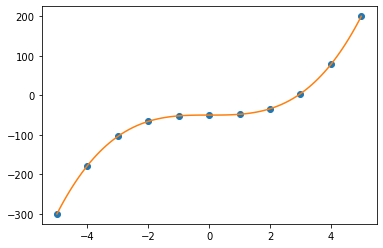

In [11]:
plt.plot(xs,ys,'o')
x=np.linspace(np.min(xs),np.max(xs),100)
plt.plot(x,func(x,param[0],param[1]))

In [13]:
p=[0,0]
param,cov = opt.curve_fit(func,xs,ys,p)
param

array([  2., -50.])

**Non noisy example 2**
- 초기 parameter에 민감한 경우가 많으므로 되도록이면 tight 하게 추정해야 한다.
- 다음 data는 0,0.2,0,4,0.6,0.8,1 초에서의 데이터이다.
0.,0.95,0.59,-0.59,-0.95,0.  
- 상기 데이터는 $y=sin(ax)$ 형태인 것을 알았다.
- a를 구하여라



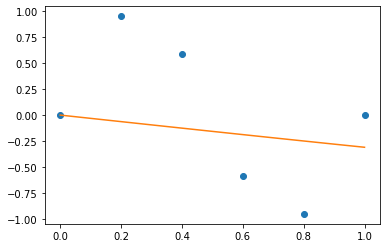

In [14]:
def func(x,a):
    return np.sin(a*x)
xs=np.arange(0,1.1,0.2)
ys=np.array([0.,0.95,0.59,-0.59,-0.95,0.])
plt.plot(xs,ys,'o')
p=[1]
param, cov = opt.curve_fit(func,xs,ys,p)
x=np.linspace(0,1,100)
y=func(x,param[0])
plt.plot(x,y)

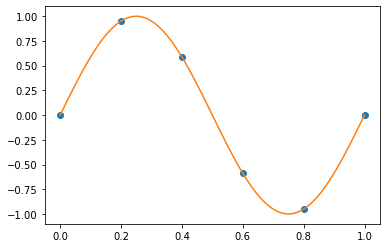

In [16]:
#paramter 미리 추정
# 주기는 약 1이다. -> sin(2*pi*x/T)
p=[2*3.14]
param,cov=opt.curve_fit(func,xs,ys,p)
plt.plot(xs,ys,'o')
x=np.linspace(0,1,100)
y=func(x,param[0])
plt.plot(x,y)


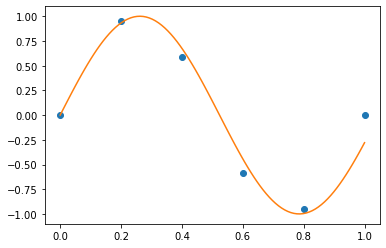

In [33]:
#이해하기 어려운 함수라면 parameter를 넣어가면서 찾아본다.
# 이경우 1,2,3, 이렇게 넣어본다.
x = np.linspace(np.min(xs),np.max(xs),100)
plt.plot(xs,ys,'o')
plt.plot(x,func(x,6))

#### Exercize: Curve fitting of temperature data
- max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18
- min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
- 주기는 12개월이다. 
    - $t=a cos\left( \frac{2\pi (x-c)}{T}\right) +b$
    - $a$: amplitude, $b$: bias, $T$: 주기, $c$: offset

In [15]:
maxmin = np.array([[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18],
[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]])

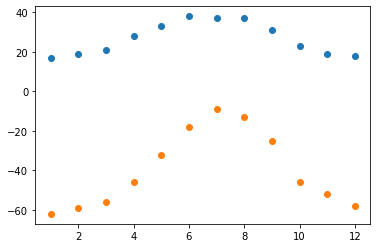

In [16]:
plt.plot(np.arange(1,13),maxmin[0],'o') #max in maxmin[0]
plt.plot(np.arange(1,13),maxmin[1],'o')

In [17]:
#define a function-cosine같다
def temp(x,a,b,c):
    return a*np.cos((x-c)/12*2*np.pi)+b

In [ ]:
x=np.arange(1,13)
Mparams, Mcov = optimize.curve_fit(temp, x, maxmin[0], p0=[10,30,7])
mparams, mcov = optimize.curve_fit(temp,x,maxmin[1],p0=[20, -40,7])
xe = np.linspace(1,13,100)
Mest = temp(xe,Mparams[0],Mparams[1],Mparams[2])
mest = temp(xe,mparams[0],mparams[1],mparams[2])
plt.plot(x,maxmin[0],'bo')
plt.plot(xe,Mest,'b')
plt.plot(x,maxmin[1],'go')
plt.plot(xe,mest,'g')

**퀴즈 scipy 1 practice 3번**

#### Curve fitting과 interpolation
- 데이터에 관한 배경함수를 안다는 것은 매우 강력한 정보를 얻는 것이다.
- interpolation은 주어진 x data 범위 내에서만 추정이 가능하지만 fitting은 그 밖에 데이터를 추정 하거나 예측할 수 있다.
- 다음 배경함수가 2차함수 인 경우에 두 방법의 차이를 알아보기 위하여 측정 데이터를 만들어 보자

[0 1 2 3 4 5 6 7 8 9]
[ 5  6  9 14 21 30 41 54 69 86]


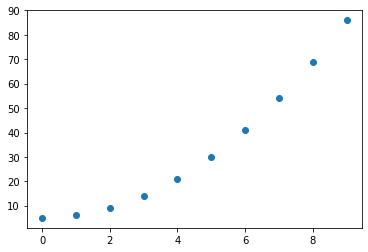

In [55]:
# example 측정 데이터
def f(x,a,b,c):
    return a*x**2+b*2+c
xs=np.arange(10)
print(xs)
a,b,c=1,2,1
ys=f(xs,a,b,c)
print(ys)
plt.plot(xs,ys,'o')

In [53]:
# x=5.5에서의 true 값과의 비교
intpf=interp1d(xs,ys,'cubic')
p=[1,1,0]
param, cov = opt.curve_fit(f,xs,ys,p)
print('true',f(5.5,a,b,c))
print('interpolation',intpf(5.5))
print('fitting',f(5.5,param[0],param[1],param[2]))

true 35.25
interpolation 35.24999999999999
fitting 35.25


In [ ]:
# interpolation으로 x-data 범위 바깥을 추정할 수 없다.
print(f(10,param[0],param[1],param[2]))
print(intpf(10))

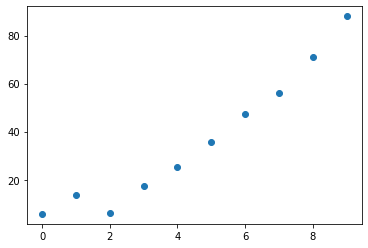

In [56]:
# 측정 데이터에 noise가 없을 경우에는 interpolation은 좋은 해법이다.
# 그러나 noise가 있을 경우에는 fitting이 보다 robust하다.
ysn=f(xs,a,b,c)+np.random.normal(0,5,len(xs))
plt.plot(xs,ysn,'o')

In [57]:
# x=5.5에서의 true 값과의 비교
intpfn=interp1d(xs,ysn,'cubic')
p=[1,2,1]
param, cov = opt.curve_fit(f,xs,ysn,p)
print('true',f(5.5,a,b,c))
print('interpolation',intpfn(5.5))
print('fitting',f(5.5,param[0],param[1],param[2]))

true 35.25
interpolation 41.8588556445745
fitting 38.40483444694832


**퀴즈 scipy 1 practice 4번**

#### 1.6.5.2 Finding the minimum of a scalar function
- Newton-Raphson method
- BFGS (Broyden,Fletcher,Goldfarb,Shanno), L-BFGS (limited memory-BFGS)
    - quasi-Newton, 적은 메모리 사용
- global optimization 문제: 
    - basinhopping: basin hopping 방법 (분지 건너뛰기)
    - brute: resolution이 크다면 (ex, 0.01, 0.1 etc) grid point를 넣어서 minimum을 찾아줌
    - annealing 방법은 0.16.0 version이후로 제거됨.
- bounded minimize
    - minimize함수에 bounds parameter를 넣는다.
    - fminbound 함수를 사용한다.
- scipy.optimize.minimize_scalar(): one variable

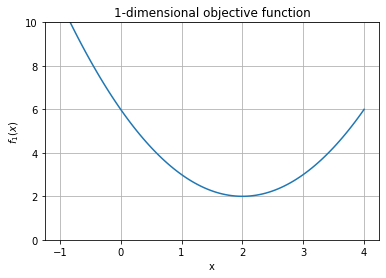

In [2]:
## opt.minimize example
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return (x-2)**2+2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel(r"$f_1(x)$")
plt.title("1-dimensional objective function")
plt.grid()

In [4]:
# nfev 는
from scipy import optimize as opt

res=opt.minimize(f1,x0=0)
res

      fun: array([2.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([2.])

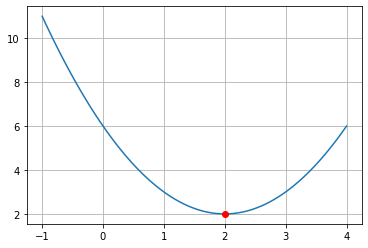

In [3]:

plt.plot(xx, f1(xx))
plt.grid()
plt.plot(res.x,res.fun,'ro')

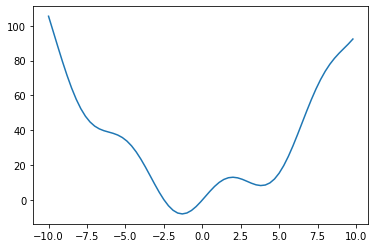

In [6]:
# minimize example 2
def f(x):
    return x**2+10*np.sin(x)

x=np.arange(-10,10,0.3)
plt.plot(x,f(x))

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.15463195e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.3064399])
fun is [-7.94582338] [-7.94582338]


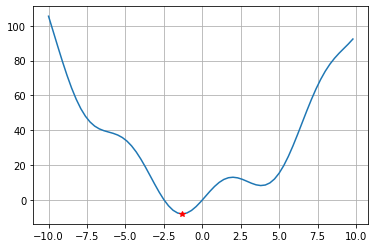

In [7]:
result = opt.minimize(f,x0=0,bounds=((-2.5,0),))
print(result)
plt.plot(x,f(x))
plt.plot(result.x, f(result.x),'r*')
plt.grid()
print('fun is', result.fun,f(result.x))

**Method**

In [30]:
op.minimize(f,x0=0,method='L-BFGS-B') #교재에서는 default nfev = 18 이라고 했지만 이 방법과 같다.

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68753901e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644017])

**Global minimum**

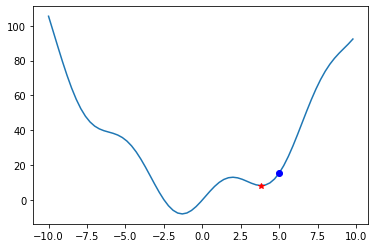

In [20]:
# local minima
x0=5
res=op.minimize(f,x0)
plt.plot(x,f(x))
plt.plot(x0,f(x0),'bo')
plt.plot(res.x,f(res.x),'r*')


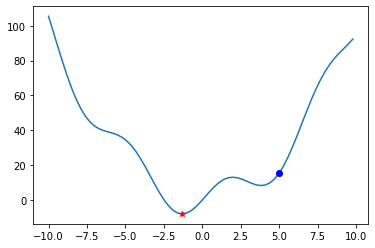

In [29]:
# basin hopping (분지 뛰어 넘기) 방법은 현재 구한 minimum 이 local miminum 인지 아닌지 최대 stepsize만큼 
# random하게 가본다. stepsize가 분지 폭보다 크도록 설정해야 한다.
x0=5
res=op.basinhopping(f,x0,stepsize=2)
plt.plot(x,f(x))
plt.plot(x0,f(x0),'bo')
plt.plot(res.x,f(res.x),'r*')

**Constraints**

In [32]:
#변수가 여러개 있을 수 있으므로 bound parameter는 tuple 들의 tuple이어야 한다.
# 변수가 1개이면 ((xmin,xmax),) 이런식으로 끝에 쉼표를 넣어줘야함. 
res=op.minimize(f,x0=1,bounds=((0,10),)) 
res.x # 이결과는 왜 '0'이 나오는 지 생각해 볼 것

array([0.])

**Minimizing functions of several variables**
- schalar variable이 아니고 vector variable로 생각하면 됨.
    - 함수 define할 때 입력 변수는 tuple로 선언해야 한다.
- scipy.optimize.minimize_scalar() 함수는 schalar variable 일 경우에 특화 된 함수이다.

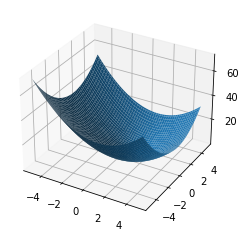

In [1]:
# simple example 1
from scipy import optimize as op
import numpy as np
import matplotlib.pyplot as plt

def f3(X): #tuple로 입력을 넣는 함수가 필요하다.
    x,y=X
    return (x-1)**2+(y-1)**2

ax=plt.subplot(projection='3d')
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
xv,yv=np.meshgrid(x,y)
ax.plot_surface(xv,yv,f3((xv,yv)))

In [2]:
res=op.minimize(f3,x0=(0,0),bounds=((-5,5),(-5,5)))
res

      fun: 4.997819254950034e-17
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.18092211e-12, 2.18092211e-12])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([1., 1.])

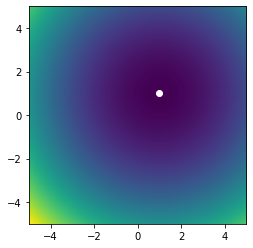

In [3]:
plt.imshow(f3((xv,yv)),extent=[-5,5,-5,5],origin='lower')
plt.plot(1,1,'wo')

In [4]:
%matplotlib qt

In [6]:
# 2 gaussian valley
def doubleValley(X):
    m1=[1,0.5]
    m2=[-0.5,-1]
    x,y=X
    return 2-np.exp(-((x-m1[0])**2+(y-m1[1])**2)/2)-np.exp(-((x-m2[0])**2+(y-m2[1])**2)/2)

xm,xM = -3,3
ym,yM = -3,3
x=np.linspace(xm,xM)
y=np.linspace(ym,yM)
xv,yv=np.meshgrid(x,y)
#ax=plt.subplot(projection='3d')
#ax.plot_surface(xv,yv,doubleValley((xv,yv)))
plt.imshow(np.log(doubleValley((xv,yv))),extent=[xm,xM,ym,yM],origin='lower')
x0s=[(-2,0),(2,-0),(0,1)]
for x0 in x0s:
    minp = op.minimize(doubleValley,x0)
    plt.plot(x0[0],x0[1],'bo')
    plt.plot(minp.x[0],minp.x[1],'go')
    plt.quiver(x0[0],x0[1],minp.x[0]-x0[0],minp.x[1]-x0[1],scale=1,scale_units='xy',angles='xy',color='r')

In [186]:
xv=np.linspace(xm,xM,1000)
yv=xv*0
plt.plot(xv,doubleValley((xv,yv)))

#### Exercise 2-D minimization (실습시간)
- six-hump camelback 함수 문제
- $f(x,y)=(4-2.1x^2 + \frac{x^4}{3})x^2 + xy+(4y^2 - 4)y^2, -2<x<2, -1<y<1$

In [33]:
def shcb(X):
    x,y=X
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2

In [34]:
x=np.linspace(-2,2,100)
y=np.linspace(-1,1,100)
xy=np.meshgrid(x,y)
z=shcb(xy)
z.shape

(100, 100)

In [41]:
%matplotlib qt
ax = plt.axes(projection='3d')
ax.plot_surface(xy[0],xy[1],z,cmap='rainbow')

In [43]:
# minimum을 확인하기 위해서는 image로 보는 것이 유리하다.
plt.imshow(z,extent=[-2,2,-1,1]) #extent parameter는 pixel number 대신에 좌표축을 제공한다.
plt.grid()

In [56]:
inivs = [(-1.5,0.75),(-1.5,-0.75),(0,0.75),(0,-0.75),(1.5,0.75),(1.5,-0.75)]
res=[]
for iv in inivs:
    res.append(op.minimize(shcb,x0=iv,bounds=((-2,2),(-1,1))))
fig, ax = plt.subplots()
plt.imshow(z,extent=[-2,2,-1,1],origin='lower') #origin을 lower로 해야함.
plt.colorbar()
for r in res:
    plt.plot(r.x[0],r.x[1],'ro')
    print(r.x,shcb(r.x))
res2 = op.basinhopping(shcb,x0=(0,0),stepsize=1)
plt.plot(res2.x[0],res2.x[1],'b+')
print('global',res2.x,shcb(res2.x))


[-1.70360669  0.79608346] -0.2154638243835756
[-1.6071049  -0.56865146] 2.1042503103113575
[-0.08984188  0.71265637] -1.0316284534898
[ 0.08984187 -0.71265638] -1.0316284534897933
[1.60710489 0.56865145] 2.104250310311349
[ 1.70360668 -0.79608347] -0.21546382438359601
global [ 0.08984201 -0.7126564 ] -1.0316284534898772


#### solution 과의 비교
- imshow 시에 origin='lower'가 필요함.
- colorbar를 표시했다.

**quiz scipy 1 practice 2 문제 1번**

#### 1.6.5.3 finding the roots of a scalar function
- scipy.optimize.root 사용
- only one root, init value 조절로 다른 root도 찾을 수 있다.


In [7]:
from scipy import optimize as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

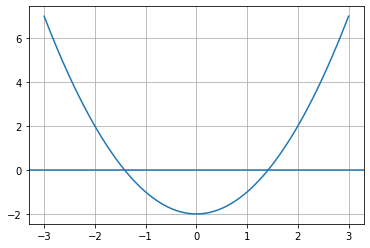

In [35]:
# simple example
def f(x):
    return x**2-2

x=np.linspace(-3,3,100)
plt.plot(x,f(x))
plt.axhline()
plt.grid()

-2.0 -1.4142135623730954
1.0 1.4142135623730947
2.0 1.4142135623730954


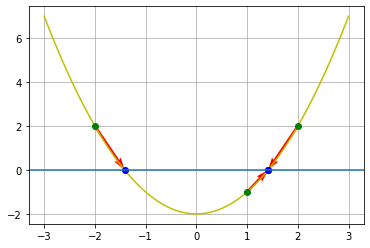

In [47]:
plt.plot(x,f(x),'y')
xi=np.array([-2.,1,2])
xs=xi*0
for i in range(len(xi)):
    sol=op.root(f,x0=xi[i])
    xs[i]=sol.x[0]
    print(xi[i],xs[i])
    plt.plot(xi[i],f(xi[i]),'go')
    plt.plot(xs[i],f(xs[i]),'bo')
plt.quiver(xi,f(xi),xs-xi,f(xs)-f(xi),scale=1,scale_units='xy',angles='xy',color='r')
plt.grid()
plt.axhline()

In [110]:
# 교재 example
def f(x):
    return x**2 + 10*np.sin(x)
x=np.linspace(-10,10,100)
plt.plot(x,f(x))
plt.axhline(0,color='0.8')

In [119]:
root = opt.root(f, 1)  # our initial guess is 1
print("First root found %s" % root.x)
root2 = opt.root(f, -2.5)
print("Second root found %s" % root2.x)

First root found [0.]
Second root found [-2.47948183]


In [113]:
gmin = opt.minimize(f,x0=-3)
lmin = opt.minimize(f,x0=5)
lmin

      fun: 8.31558557947746
 hess_inv: array([[0.11879106]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([3.83746712])

In [122]:
# Plot the function
import matplotlib.pyplot as plt
ax=plt.gca()
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
ax.plot([gmin.x,lmin.x], [gmin.fun,lmin.fun], 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')

**quiz scipy 1 practice 2 문제 2번**